# BitForecast 💰📈

## Getting data

Using the historical price data of Bitcoin to try and predict the future price of Bitcoin, we downloaded the data from here: https://www.coindesk.com/price/bitcoin

## Importing time series with pandas

In [1]:
# Import with pandas
import pandas as pd 
# Read Bitcoin data and parse the dates
df = pd.read_csv("BTC_USD_CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) # parse the date column and tell pandas column 1 is a datetime 

df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [2]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [4]:
# How many samples do we have?
len(df)

2787

Typically deep learning models usually performs better on lots of samples.

A smaller number of samples is something you'll often run into with time series data problems.

> **NOTE:** The **seasonality** of a time series dataset is referred as the number of samples per year. So for our Bitcoin data, it has a seaonality of daily or value of 365 because we collect one sample per day meaning we'll get 365 samples per year.

In [5]:
# Only want closing price for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


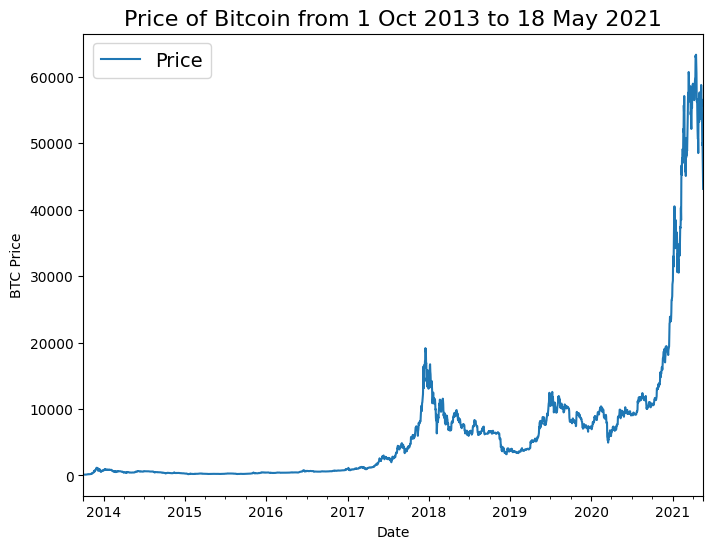

In [6]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(8, 6))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

## Importing time series data with Python's CSV module

In [7]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("BTC_USD_CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader) # skip first line (this skips all of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates (not strings)
    btc_price.append(float(line[2])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

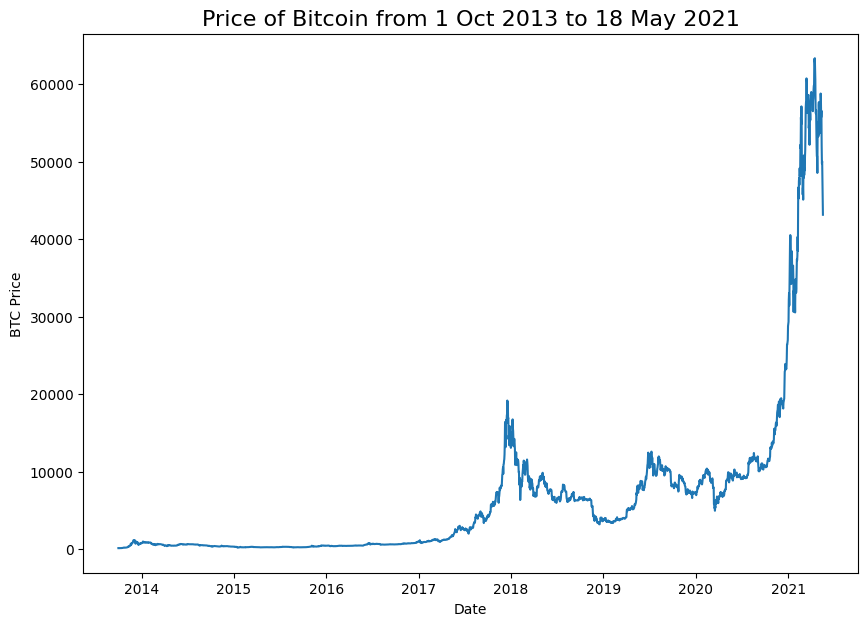

In [8]:
# Plot from CSV
import matplotlib.pyplot as plt
# import numpy as np
plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date");

## Format data part 1: Create train and test sets of our time series data

### Creating train and test sets with time series data (NOT RECOMMENDED)

In [9]:
bitcoin_prices[:5]

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [10]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [11]:
# Method 1 to make train/test sets for time series data (NOT RECOMMENDED)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # BTC prices
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

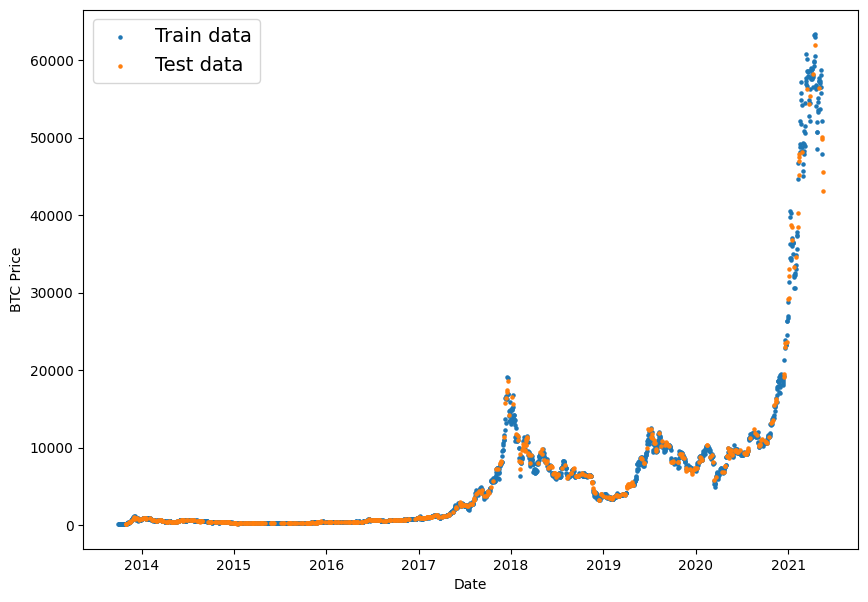

In [12]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

**NOTE:** The below method is always recommended to be used during the time series data analysis. Since, the above method using the sklearn train and test split will split the data randomly which will lead to data from (pseudo) future leaks into past and we need the data in a way such that we will predict the future value of the bitcoin, hence we need to split the data manually.

### Create train & test sets for time series (RECOMMENDED)

In [15]:
# Create train and test splits the correct way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test (can be changed as per needed)

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything beyond the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

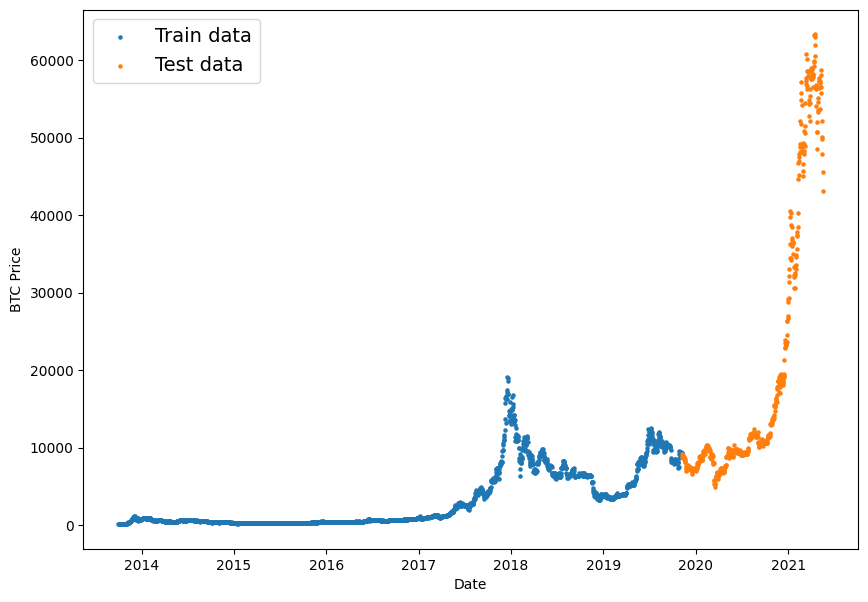

In [16]:
# Plot correctly made splits
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

## Create a plotting function

In [17]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  """
  Plots timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ----------
  timesteps : array of timestep values
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (similar to start but for the end)
  label : label to show on plot about values, default None 
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

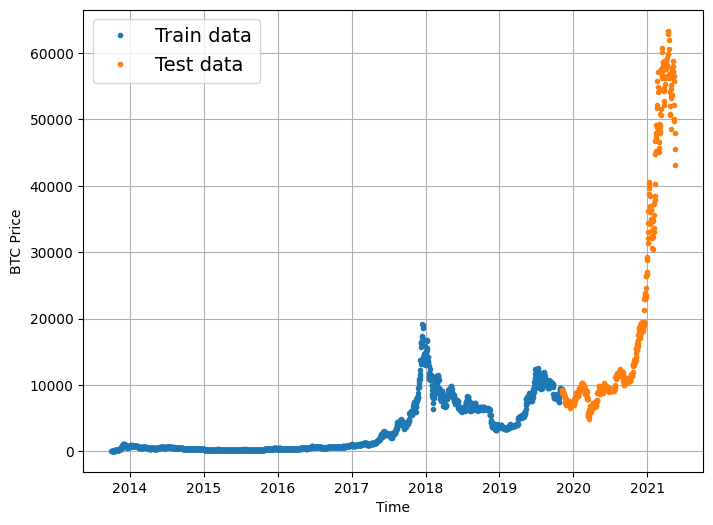

In [18]:
# Test out plotting function
plt.figure(figsize=(8, 6))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

## Modelling Experiments

We have got some Bitcoin historical data, to model it, let's run a series of modelling experiments and see which model performs best.

**IMPORTANT TERMS:**
* **Window size** = number of timesteps we're going to use to predict **horizon**
* **Horizon** = number of timesteps into the future we're going to predict

Modelling experiments, We will build:
* Model 0 - Naive model (baseline)	
* Model 1 - Dense model, window = 7, horizon = 1
* Model 2 - Same as 1, 	window = 30, horizon = 1
* Model 3 - Same as 1, 	window = 30, horizon = 7
* Model 4 - Conv1D, window = 7, horizon = 1
* Model 5 - LSTM, window = 7, horizon = 1
* Model 6 - Same as 1 Dense model (but with multivariate data), window = 7, horizon = 1
* Model 7 - N-BEATs Algorithm, window = 7, horizon = 1
* Model 8 - Ensemble (multiple models optimized on different loss functions), window = 7, horizon = 1
* Model 9 - Future prediction model (model to predict future values), window = 7, horizon = 1
* Model 10 - Same as 1 (but with turkey data introduced), window = 7, horizon = 1

## Model 0: Naive forecast (baseline)

The formula looks like this:
$$\hat{y}_{t} = y_{t-1}$$
> The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (previous timestep) - this is for a horizon of 1.

In [19]:
# Test Set Prices of Bitcoin
y_test[:10]

array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
       8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
       8500.64355816, 8469.2608989 ])

In [20]:
# Create a naive forecast 
naive_forecast = y_test[:-1]

# NOTE: Since, in the naive forecast model predicts the future forecast as from the previous forecast  y(t) = y(t-1) 
naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

In [21]:
y_test[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

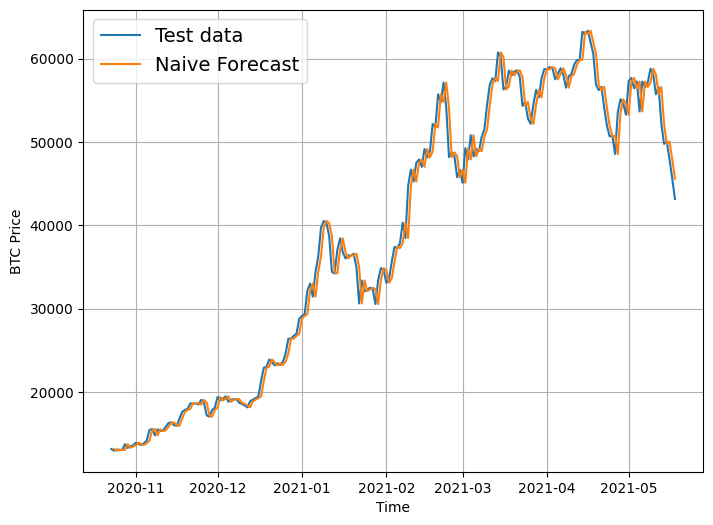

In [26]:
# Plot naive forecast
plt.figure(figsize=(8, 6))
# plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, start=350, format="-", label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, start=350, format="-", label="Naive Forecast")

## Evaluating a time series model

Some evaluation metrics for time series forecasting. 

Since, we are predicting a number, so that means we have a form of a regression problem.

Because we are working on a regression problem, we will require some regression-like metrics.

A few common regression metrics (which can also be used for time series forecasting):
* MAE - mean absolute error
* MSE - mean squared error
* RMSE - root mean square error
* MAPE/sMAPE - (symmetric) mean absolute percentage error
* MASE - mean absolute scaled error

For all of the above metrics, **lower is better**, for example, an MAE of 0 that is better than an MAE of 100.

The important thing evaluating here is: **how do model's forecasts (y_pred) compare against the actual values (y_true or ground truth values)?**

> **IMPORTANT RESOURCE:** For a deeper dive on the various kinds of time series forecasting methods see [Forecasting: Principles and Practice chapter 5.8](https://otexts.com/fpp3/accuracy.html) 

In [27]:
import tensorflow as tf

In [28]:
# MASE implementation
# A scaled error is >1 if the forecast is worse than the naive and <1 if the forecast is better than the naive.
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shift of 1)

  return mae / mae_naive_no_season

In [29]:
# Test MASE (this value should = 1 or be very close to 1 with the naive forecast)
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182626

### Evaluation function with various metrics

In [30]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations with TensorFlow)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics 
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [31]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)

naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

In [32]:
naive_forecast[-10:]

array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
       56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361])

In [33]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737226>

In [34]:
tf.reduce_min(y_test), tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>,
 <tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>)

## Other kinds of time series forecasting models which can be used for baselines and actual forecasts

* Moving average - https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/
* ARIMA (Autoregression Integrated Moving Average) - https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
* sktime (Scikit-Learn for time series) - https://github.com/alan-turing-institute/sktime
* TensorFlow Decision Forests (random forest, gradient boosting trees) - https://www.tensorflow.org/decision_forests
* Facebook Kats (purpose-built forecasting and time series analysis library by Facebook) - https://github.com/facebookresearch/Kats
* LinkedIn Greykite (flexible, intuitive and fast forecasts) - https://github.com/linkedin/greykite

## Format Data Part 2: Windowing our dataset

We window our time series dataset to turn our data into a supervised learning problem.

```
Windowing for one week
[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]
```

In [35]:
# What we want to do with our Bitcoin data
# We will use the past 7 days of data to predict the price of Bitcoin on the next day
print(f"We want to use: {btc_price[:7]} to predict this: {btc_price[7]}")

We want to use: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this: 123.033


In [36]:
# Setup GLOBAL VARIABLES for window and horizon size
WINDOW_SIZE = 7 # use the past week of Bitcoin data to make the prediction
HORIZON = 1 # predict next 1 day

In [37]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1
  Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output: ([0, 1, 2, 3, 4, 5, 6], [7])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [38]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] -> Label: 7


We have build a function to label our windowed data. However, this only works on a small scale. Thus, it won't work across the entire time series dataset. We can use the Python for loops, but for large time series, that will be quite slow.

* To speed up, we will use NumPy's array indexing: https://numpy.org/doc/stable/reference/arrays.indexing.html.

Thus, the function created will:
1. Create a window step of specific window size (e.g. [0, 1, 2, 3, 4, 5, 6])
2. Use NumPy indexing to create a 2D array of multiple window steps, for example: 
```
[[0, 1, 2, 3, 4, 5, 6],
[1, 2, 3, 4, 5, 6, 7],
[2, 3, 4, 5, 6, 7, 8]]
```
1. Uses the 2D array of multiple window steps (from step 2) to index on a target series (e.g. the historical price of Bitcoin)
2. Uses our `get_labelled_windows()` function we created above to turn the window steps into windows with a specified horizon. 

> **IMPORTANT RESOURCE:** The function has been adapted from the following article: https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5

In [72]:
import numpy as np

# Create function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of window_size with horizon size labels.
  """
  # 1. Create a window of specific window_size (add the horzion on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(window_step)

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  # create 2D array of windows of size window_size
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T 
  # print(f"Window indexes:\n {window_indexes, window_indexes.shape}")

  # 3. Index on the target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  # print(windowed_array)

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
  return windows, labels

In [75]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [77]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [78]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


## Turning windows into training and test sets

In [79]:
full_windows[:5], full_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [80]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of winodws and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [81]:
# Create train and test windows 
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [82]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [83]:
test_windows[:5], test_labels[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

In [85]:
train_labels[:-HORIZON-1]

array([[ 123.033     ],
       [ 124.049     ],
       [ 125.96116   ],
       ...,
       [9369.62808116],
       [9326.59962378],
       [9335.75240233]])

In [84]:
# Check to see if train labels are the same (before and after window split)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

## Creating modelling checkpoint callback

We will compare each of our model's best performances against the other model's best performances.

For example, if our model performs the best on epoch 55 (but we're training for 100 epochs), we want to load and evaluate the model saved on epoch 55.

We can create a modelling checkpoint callback using the following: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

In [97]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            monitor="val_loss",
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True)

## Model 1: Dense model (window = 7, horizon = 1)

First deep model is going to be a simple dense model:
* A single dense layer with 128 hidden units and ReLU
* An output layer with linear activation (no activation)
* Adam optimizaiton and MAE loss function
* Batch size of 128
* 100 epochs 

- **Hyperparameters** = values a machine learning practitioner can adjust themselves
- **Parameters** = values a model learns on its own

In [98]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# 1. Construct the model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation               
], name="model_1_dense") # name our model so we can save it

# 2. Compile the model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# 3. Fit the model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 2371.2253 - mae: 2371.2253 - mse: 16036579.0000 

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 3s 93ms/step - loss: 2371.2253 - mae: 2371.2253 - mse: 16036579.0000 - val_loss: 2801.3201 - val_mae: 2801.3201 - val_mse: 16967458.0000
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 320.8903 - mae: 320.8903 - mse: 446705.6250

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 67ms/step - loss: 372.7253 - mae: 372.7253 - mse: 539941.4375 - val_loss: 1650.2332 - val_mae: 1650.2332 - val_mse: 6914761.5000
Epoch 3/100
16/18 [=========================>....] - ETA: 0s - loss: 256.6220 - mae: 256.6220 - mse: 302260.5000

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 87ms/step - loss: 252.0290 - mae: 252.0290 - mse: 298388.0000 - val_loss: 1165.2491 - val_mae: 1165.2491 - val_mse: 4430542.5000
Epoch 4/100
15/18 [========================>.....] - ETA: 0s - loss: 209.1244 - mae: 209.1244 - mse: 225633.0156

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 2s 127ms/step - loss: 211.0715 - mae: 211.0715 - mse: 226901.8125 - val_loss: 1139.6064 - val_mae: 1139.6064 - val_mse: 4333889.0000
Epoch 5/100
18/18 [==============================] - 0s 10ms/step - loss: 204.9219 - mae: 204.9219 - mse: 217873.1875 - val_loss: 1148.1582 - val_mae: 1148.1582 - val_mse: 4188748.0000
Epoch 6/100
17/18 [===========================>..] - ETA: 0s - loss: 198.5373 - mae: 198.5373 - mse: 195947.1250

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 52ms/step - loss: 200.3311 - mae: 200.3311 - mse: 208289.9844 - val_loss: 1111.4523 - val_mae: 1111.4523 - val_mse: 4128746.7500
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 252.8341 - mae: 252.8341 - mse: 436858.0312

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 69ms/step - loss: 196.8184 - mae: 196.8184 - mse: 201702.3750 - val_loss: 1067.0442 - val_mae: 1067.0442 - val_mse: 3746145.5000
Epoch 8/100
18/18 [==============================] - ETA: 0s - loss: 189.4518 - mae: 189.4518 - mse: 187885.7500

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 61ms/step - loss: 189.4518 - mae: 189.4518 - mse: 187885.7500 - val_loss: 1061.3373 - val_mae: 1061.3373 - val_mse: 3589631.0000
Epoch 9/100
17/18 [===========================>..] - ETA: 0s - loss: 184.3265 - mae: 184.3265 - mse: 181389.6562

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 52ms/step - loss: 184.2583 - mae: 184.2583 - mse: 180037.1875 - val_loss: 1039.6354 - val_mae: 1039.6354 - val_mse: 3416288.5000
Epoch 10/100
17/18 [===========================>..] - ETA: 0s - loss: 178.9099 - mae: 178.9099 - mse: 171527.8750

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 56ms/step - loss: 180.4284 - mae: 180.4284 - mse: 172604.2344 - val_loss: 992.6938 - val_mae: 992.6938 - val_mse: 3194088.0000
Epoch 11/100
15/18 [========================>.....] - ETA: 0s - loss: 175.2511 - mae: 175.2511 - mse: 164978.4688

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 56ms/step - loss: 174.3693 - mae: 174.3693 - mse: 161314.2656 - val_loss: 952.0773 - val_mae: 952.0775 - val_mse: 3012487.0000
Epoch 12/100
18/18 [==============================] - 0s 10ms/step - loss: 170.3847 - mae: 170.3847 - mse: 153121.2812 - val_loss: 1105.9299 - val_mae: 1105.9299 - val_mse: 3384498.5000
Epoch 13/100
18/18 [==============================] - ETA: 0s - loss: 169.9096 - mae: 169.9096 - mse: 154771.8281

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 48ms/step - loss: 169.9096 - mae: 169.9096 - mse: 154771.8281 - val_loss: 905.1431 - val_mae: 905.1431 - val_mse: 2686970.7500
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 189.5857 - mae: 189.5857 - mse: 177341.0625

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 63ms/step - loss: 159.5723 - mae: 159.5723 - mse: 137843.0000 - val_loss: 905.0954 - val_mae: 905.0954 - val_mse: 2580751.5000
Epoch 15/100
18/18 [==============================] - 0s 10ms/step - loss: 160.7240 - mae: 160.7240 - mse: 137494.4219 - val_loss: 1007.5056 - val_mae: 1007.5056 - val_mse: 2840894.5000
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 157.5920 - mae: 157.5920 - mse: 99638.1094

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 48ms/step - loss: 157.1239 - mae: 157.1239 - mse: 131626.5156 - val_loss: 848.8624 - val_mae: 848.8624 - val_mse: 2307141.0000
Epoch 17/100
14/18 [======================>.......] - ETA: 0s - loss: 147.4286 - mae: 147.4286 - mse: 118721.5547

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 54ms/step - loss: 149.3200 - mae: 149.3200 - mse: 121097.4219 - val_loss: 825.0844 - val_mae: 825.0844 - val_mse: 2189470.5000
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 152.2730 - mae: 152.2730 - mse: 103695.5156

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 43ms/step - loss: 144.9763 - mae: 144.9763 - mse: 116483.5234 - val_loss: 810.1152 - val_mae: 810.1152 - val_mse: 2099029.5000
Epoch 19/100
 1/18 [>.............................] - ETA: 0s - loss: 82.9104 - mae: 82.9104 - mse: 37079.3438

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 44ms/step - loss: 141.1312 - mae: 141.1312 - mse: 111306.0781 - val_loss: 784.9943 - val_mae: 784.9943 - val_mse: 1996403.1250
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 149.6286 - mae: 149.6286 - mse: 135412.2031

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 86ms/step - loss: 141.0331 - mae: 141.0331 - mse: 111912.4844 - val_loss: 759.7964 - val_mae: 759.7964 - val_mse: 1957176.6250
Epoch 21/100
13/18 [====================>.........] - ETA: 0s - loss: 141.5419 - mae: 141.5419 - mse: 105645.4062

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 48ms/step - loss: 141.4973 - mae: 141.4973 - mse: 110604.7969 - val_loss: 744.5723 - val_mae: 744.5723 - val_mse: 1837563.0000
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 192.1605 - mae: 192.1605 - mse: 213196.3438

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 45ms/step - loss: 135.3165 - mae: 135.3165 - mse: 102753.8516 - val_loss: 730.1885 - val_mae: 730.1885 - val_mse: 1776995.5000
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 150.7737 - mae: 150.7737 - mse: 103001.3906

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 44ms/step - loss: 133.4990 - mae: 133.4990 - mse: 99525.7812 - val_loss: 725.2820 - val_mae: 725.2820 - val_mse: 1734394.0000
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 147.9784 - mae: 147.9784 - mse: 97086.9453

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 45ms/step - loss: 132.9074 - mae: 132.9074 - mse: 98570.1250 - val_loss: 703.9578 - val_mae: 703.9578 - val_mse: 1678812.8750
Epoch 25/100
18/18 [==============================] - 0s 5ms/step - loss: 135.1676 - mae: 135.1676 - mse: 97242.7734 - val_loss: 704.2468 - val_mae: 704.2468 - val_mse: 1696460.0000
Epoch 26/100
18/18 [==============================] - 0s 7ms/step - loss: 132.1337 - mae: 132.1337 - mse: 95533.1641 - val_loss: 710.7179 - val_mae: 710.7179 - val_mse: 1722327.1250
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 196.0533 - mae: 196.0533 - mse: 177600.4375

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 50ms/step - loss: 130.4085 - mae: 130.4085 - mse: 94915.1172 - val_loss: 681.8040 - val_mae: 681.8040 - val_mse: 1598662.7500
Epoch 28/100
18/18 [==============================] - 0s 4ms/step - loss: 127.2826 - mae: 127.2826 - mse: 91111.6328 - val_loss: 682.2699 - val_mae: 682.2699 - val_mse: 1562786.5000
Epoch 29/100
18/18 [==============================] - 0s 10ms/step - loss: 125.4954 - mae: 125.4954 - mse: 89629.2266 - val_loss: 708.4170 - val_mae: 708.4170 - val_mse: 1613986.3750
Epoch 30/100
18/18 [==============================] - 0s 5ms/step - loss: 130.5779 - mae: 130.5779 - mse: 91760.5000 - val_loss: 731.3862 - val_mae: 731.3862 - val_mse: 1666387.7500
Epoch 31/100
18/18 [==============================] - 0s 4ms/step - loss: 137.9399 - mae: 137.9399 - mse: 96928.4297 - val_loss: 853.8484 - val_mae: 853.8484 - val_mse: 2043721.5000
Epoch 32/100
18/18 [==============================] - 0s 4ms/step - loss: 133.9428 - mae: 133.9428 - 

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 59ms/step - loss: 124.5342 - mae: 124.5342 - mse: 87466.3203 - val_loss: 644.4610 - val_mae: 644.4610 - val_mse: 1440930.0000
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 103.2353 - mae: 103.2353 - mse: 55513.9844

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 41ms/step - loss: 119.9175 - mae: 119.9175 - mse: 84151.4062 - val_loss: 642.6091 - val_mae: 642.6091 - val_mse: 1440188.3750
Epoch 36/100
18/18 [==============================] - 0s 3ms/step - loss: 126.6927 - mae: 126.6927 - mse: 87392.2656 - val_loss: 692.8871 - val_mae: 692.8871 - val_mse: 1537456.1250
Epoch 37/100
18/18 [==============================] - 0s 4ms/step - loss: 122.4420 - mae: 122.4420 - mse: 85021.5078 - val_loss: 662.9973 - val_mae: 662.9973 - val_mse: 1509095.5000
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 115.7505 - mae: 115.7505 - mse: 75697.4609

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 53ms/step - loss: 121.1891 - mae: 121.1891 - mse: 84880.1250 - val_loss: 635.9137 - val_mae: 635.9137 - val_mse: 1396408.3750
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 130.4823 - mae: 130.4823 - mse: 107212.8438

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 40ms/step - loss: 119.1690 - mae: 119.1690 - mse: 82741.7188 - val_loss: 632.5483 - val_mae: 632.5483 - val_mse: 1403335.3750
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 109.3603 - mae: 109.3603 - mse: 105274.2031

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 50ms/step - loss: 119.5924 - mae: 119.5924 - mse: 81957.8047 - val_loss: 629.4961 - val_mae: 629.4961 - val_mse: 1392240.6250
Epoch 41/100
18/18 [==============================] - 0s 5ms/step - loss: 122.7009 - mae: 122.7009 - mse: 83890.5078 - val_loss: 658.8821 - val_mae: 658.8821 - val_mse: 1481397.1250
Epoch 42/100
18/18 [==============================] - 0s 4ms/step - loss: 124.6744 - mae: 124.6744 - mse: 86081.0000 - val_loss: 631.1104 - val_mae: 631.1104 - val_mse: 1398016.8750
Epoch 43/100
18/18 [==============================] - 0s 4ms/step - loss: 117.1638 - mae: 117.1638 - mse: 79591.6250 - val_loss: 636.5634 - val_mae: 636.5634 - val_mse: 1411823.1250
Epoch 44/100
 1/18 [>.............................] - ETA: 0s - loss: 73.1118 - mae: 73.1118 - mse: 19362.5977

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 71ms/step - loss: 118.5055 - mae: 118.5055 - mse: 80554.6797 - val_loss: 620.5840 - val_mae: 620.5840 - val_mse: 1359306.6250
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 119.3130 - mae: 119.3130 - mse: 82288.5547 - val_loss: 637.9014 - val_mae: 637.9014 - val_mse: 1372785.7500
Epoch 46/100
 1/18 [>.............................] - ETA: 0s - loss: 91.8922 - mae: 91.8922 - mse: 57115.5703

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 53ms/step - loss: 118.6076 - mae: 118.6076 - mse: 80900.7734 - val_loss: 616.8311 - val_mae: 616.8311 - val_mse: 1327819.5000
Epoch 47/100
18/18 [==============================] - 0s 6ms/step - loss: 120.9625 - mae: 120.9625 - mse: 83483.1484 - val_loss: 698.0241 - val_mae: 698.0241 - val_mse: 1521106.1250
Epoch 48/100
18/18 [==============================] - 0s 4ms/step - loss: 116.9901 - mae: 116.9901 - mse: 78725.3047 - val_loss: 617.4734 - val_mae: 617.4734 - val_mse: 1321238.2500
Epoch 49/100
18/18 [==============================] - 0s 4ms/step - loss: 117.5563 - mae: 117.5563 - mse: 80236.7109 - val_loss: 676.3707 - val_mae: 676.3707 - val_mse: 1459110.5000
Epoch 50/100
18/18 [==============================] - 0s 4ms/step - loss: 135.0732 - mae: 135.0732 - mse: 87728.1406 - val_loss: 635.0325 - val_mae: 635.0325 - val_mse: 1354260.2500
Epoch 51/100
18/18 [==============================] - 0s 4ms/step - loss: 115.8946 - mae: 115.8946 - m

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 45ms/step - loss: 120.1368 - mae: 120.1368 - mse: 80544.6250 - val_loss: 613.7180 - val_mae: 613.7180 - val_mse: 1301253.8750
Epoch 54/100
18/18 [==============================] - 0s 10ms/step - loss: 119.4502 - mae: 119.4502 - mse: 79935.1016 - val_loss: 651.9584 - val_mae: 651.9584 - val_mse: 1387428.8750
Epoch 55/100
 1/18 [>.............................] - ETA: 0s - loss: 138.0572 - mae: 138.0572 - mse: 98618.1250

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 62ms/step - loss: 117.9019 - mae: 117.9019 - mse: 79481.6797 - val_loss: 608.0829 - val_mae: 608.0829 - val_mse: 1309418.6250
Epoch 56/100
18/18 [==============================] - 0s 6ms/step - loss: 113.8500 - mae: 113.8500 - mse: 76479.2734 - val_loss: 806.6090 - val_mae: 806.6090 - val_mse: 1918446.7500
Epoch 57/100
18/18 [==============================] - 0s 6ms/step - loss: 134.7850 - mae: 134.7850 - mse: 92500.4531 - val_loss: 732.6119 - val_mae: 732.6119 - val_mse: 1657892.6250
Epoch 58/100
18/18 [==============================] - 0s 6ms/step - loss: 126.8406 - mae: 126.8406 - mse: 85323.6016 - val_loss: 653.8862 - val_mae: 653.8862 - val_mse: 1415952.2500
Epoch 59/100
12/18 [===================>..........] - ETA: 0s - loss: 112.7436 - mae: 112.7436 - mse: 78171.9531

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 87ms/step - loss: 114.3456 - mae: 114.3456 - mse: 75894.6094 - val_loss: 603.2684 - val_mae: 603.2684 - val_mse: 1291524.6250
Epoch 60/100
18/18 [==============================] - 0s 12ms/step - loss: 113.7244 - mae: 113.7244 - mse: 76473.1016 - val_loss: 603.7241 - val_mae: 603.7241 - val_mse: 1271072.6250
Epoch 61/100
18/18 [==============================] - 0s 6ms/step - loss: 112.7511 - mae: 112.7511 - mse: 76063.3359 - val_loss: 607.7527 - val_mae: 607.7527 - val_mse: 1276417.3750
Epoch 62/100
 1/18 [>.............................] - ETA: 0s - loss: 78.9516 - mae: 78.9516 - mse: 42996.9648

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 67ms/step - loss: 111.5149 - mae: 111.5149 - mse: 74247.8594 - val_loss: 598.2030 - val_mae: 598.2030 - val_mse: 1274131.2500
Epoch 63/100
18/18 [==============================] - 0s 6ms/step - loss: 113.5972 - mae: 113.5972 - mse: 76142.7812 - val_loss: 602.4269 - val_mae: 602.4269 - val_mse: 1263787.0000
Epoch 64/100
18/18 [==============================] - 0s 4ms/step - loss: 113.1852 - mae: 113.1852 - mse: 75227.7969 - val_loss: 618.3867 - val_mae: 618.3867 - val_mse: 1295485.0000
Epoch 65/100
 1/18 [>.............................] - ETA: 0s - loss: 133.2272 - mae: 133.2272 - mse: 157716.7656

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 46ms/step - loss: 116.7842 - mae: 116.7842 - mse: 76793.7266 - val_loss: 587.7099 - val_mae: 587.7099 - val_mse: 1243522.8750
Epoch 66/100
18/18 [==============================] - 0s 11ms/step - loss: 114.8641 - mae: 114.8641 - mse: 74621.0312 - val_loss: 591.2753 - val_mae: 591.2753 - val_mse: 1252373.6250
Epoch 67/100
18/18 [==============================] - 0s 10ms/step - loss: 111.6639 - mae: 111.6639 - mse: 73232.1172 - val_loss: 679.8810 - val_mae: 679.8810 - val_mse: 1467059.6250
Epoch 68/100
18/18 [==============================] - 0s 8ms/step - loss: 116.4464 - mae: 116.4464 - mse: 73391.7891 - val_loss: 744.4190 - val_mae: 744.4190 - val_mse: 1671962.0000
Epoch 69/100
18/18 [==============================] - 0s 6ms/step - loss: 132.2703 - mae: 132.2703 - mse: 87871.3828 - val_loss: 699.2435 - val_mae: 699.2435 - val_mse: 1524126.6250
Epoch 70/100
18/18 [==============================] - 0s 8ms/step - loss: 123.7720 - mae: 123.7720 -

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 57ms/step - loss: 111.3534 - mae: 111.3534 - mse: 73631.6875 - val_loss: 585.1522 - val_mae: 585.1522 - val_mse: 1228076.1250
Epoch 73/100
18/18 [==============================] - 0s 8ms/step - loss: 112.6930 - mae: 112.6930 - mse: 73891.1641 - val_loss: 636.9014 - val_mae: 636.9014 - val_mse: 1350206.2500
Epoch 74/100
 1/18 [>.............................] - ETA: 0s - loss: 169.7133 - mae: 169.7133 - mse: 178324.5938

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 45ms/step - loss: 110.5595 - mae: 110.5595 - mse: 73387.5938 - val_loss: 584.4964 - val_mae: 584.4964 - val_mse: 1231342.8750
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 111.1291 - mae: 111.1291 - mse: 72961.2188 - val_loss: 597.2874 - val_mae: 597.2874 - val_mse: 1242257.2500
Epoch 76/100
 1/18 [>.............................] - ETA: 0s - loss: 80.9615 - mae: 80.9615 - mse: 29210.3867

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 75ms/step - loss: 113.3444 - mae: 113.3444 - mse: 74898.8906 - val_loss: 582.8467 - val_mae: 582.8467 - val_mse: 1224813.1250
Epoch 77/100
18/18 [==============================] - 0s 6ms/step - loss: 110.9476 - mae: 110.9476 - mse: 72417.5078 - val_loss: 591.9425 - val_mae: 591.9425 - val_mse: 1244111.0000
Epoch 78/100
18/18 [==============================] - 0s 5ms/step - loss: 114.6244 - mae: 114.6244 - mse: 75383.2344 - val_loss: 610.1310 - val_mae: 610.1310 - val_mse: 1264168.1250
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 110.4056 - mae: 110.4056 - mse: 73931.3203 - val_loss: 628.2992 - val_mae: 628.2992 - val_mse: 1318873.3750
Epoch 80/100
18/18 [==============================] - 0s 5ms/step - loss: 111.1091 - mae: 111.1091 - mse: 73532.3828 - val_loss: 603.2129 - val_mae: 603.2129 - val_mse: 1247780.5000
Epoch 81/100
18/18 [==============================] - 0s 4ms/step - loss: 109.1832 - mae: 109.1832 - m

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 59ms/step - loss: 116.4781 - mae: 116.4781 - mse: 77700.4062 - val_loss: 578.9484 - val_mae: 578.9484 - val_mse: 1204725.3750
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 114.3931 - mae: 114.3931 - mse: 75445.8281 - val_loss: 664.5399 - val_mae: 664.5399 - val_mse: 1410117.2500
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 113.8804 - mae: 113.8804 - mse: 73057.1797 - val_loss: 608.7894 - val_mae: 608.7894 - val_mse: 1270481.5000
Epoch 85/100
18/18 [==============================] - 0s 6ms/step - loss: 110.8611 - mae: 110.8611 - mse: 72458.4844 - val_loss: 624.7332 - val_mae: 624.7332 - val_mse: 1286635.5000
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 109.7541 - mae: 109.7541 - mse: 70674.4297 - val_loss: 607.0733 - val_mae: 607.0733 - val_mse: 1251584.7500
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 108.6530 - mae: 108.6530 - m

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 52ms/step - loss: 108.9353 - mae: 108.9353 - mse: 70818.2266 - val_loss: 573.3650 - val_mae: 573.3650 - val_mse: 1195144.1250
Epoch 90/100
18/18 [==============================] - 0s 6ms/step - loss: 108.2294 - mae: 108.2294 - mse: 68478.9062 - val_loss: 616.4083 - val_mae: 616.4083 - val_mse: 1264152.3750
Epoch 91/100
18/18 [==============================] - 0s 5ms/step - loss: 113.9224 - mae: 113.9224 - mse: 73841.8516 - val_loss: 661.2878 - val_mae: 661.2878 - val_mse: 1394841.7500
Epoch 92/100
18/18 [==============================] - 0s 5ms/step - loss: 110.1197 - mae: 110.1197 - mse: 71940.3516 - val_loss: 652.1838 - val_mae: 652.1838 - val_mse: 1370697.2500
Epoch 93/100
18/18 [==============================] - 0s 5ms/step - loss: 119.2315 - mae: 119.2315 - mse: 75998.5859 - val_loss: 657.3577 - val_mae: 657.3577 - val_mse: 1383093.6250
Epoch 94/100
18/18 [==============================] - 0s 6ms/step - loss: 112.2807 - mae: 112.2807 - m

INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets


18/18 [==============================] - 1s 69ms/step - loss: 107.5167 - mae: 107.5167 - mse: 69571.5000 - val_loss: 570.1768 - val_mae: 570.1768 - val_mse: 1184536.6250
Epoch 96/100
18/18 [==============================] - 0s 6ms/step - loss: 114.8537 - mae: 114.8537 - mse: 73203.6328 - val_loss: 702.6754 - val_mae: 702.6754 - val_mse: 1507538.0000
Epoch 97/100
18/18 [==============================] - 0s 5ms/step - loss: 111.0783 - mae: 111.0783 - mse: 73562.2578 - val_loss: 589.8061 - val_mae: 589.8061 - val_mse: 1211167.8750
Epoch 98/100
18/18 [==============================] - 0s 5ms/step - loss: 110.8947 - mae: 110.8947 - mse: 72316.8281 - val_loss: 595.4794 - val_mae: 595.4794 - val_mse: 1232217.5000
Epoch 99/100
18/18 [==============================] - 0s 6ms/step - loss: 108.5504 - mae: 108.5504 - mse: 71184.2344 - val_loss: 575.3597 - val_mae: 575.3597 - val_mse: 1183689.0000
Epoch 100/100
18/18 [==============================] - 0s 6ms/step - loss: 115.2950 - mae: 115.2950 - 

In [99]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 699.7551 - mae: 699.7551 - mse: 1456603.1250


[699.755126953125, 699.755126953125, 1456603.125]

In [100]:
# Load in saved best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 1s 7ms/step - loss: 570.1768 - mae: 570.1768 - mse: 1184536.6250


[570.1767578125, 570.1767578125, 1184536.625]